<a href="https://colab.research.google.com/github/Marcellinus08/Deep-Learning/blob/main/CIFAR_10_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow

In [14]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

In [15]:
# Load CIFAR-10 dataset from tensorflow_datasets
(ds_train, ds_test), ds_info = tfds.load(
    'cifar10', split=['train', 'test'], as_supervised=True, with_info=True
)

# Preprocessing and Augmentation
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_contrast(image, lower=0.7, upper=1.3)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_hue(image, max_delta=0.1)
    image = tf.image.random_saturation(image, lower=0.7, upper=1.3)
    return image, label

AUTOTUNE = tf.data.AUTOTUNE
ds_train = ds_train.map(preprocess).map(augment).shuffle(10000).batch(64).prefetch(AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(64).prefetch(AUTOTUNE)

In [16]:
# CNN Model with more layers and dropout
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Compile model
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

In [18]:
# Train the model
cnn_model.fit(ds_train, epochs=30, validation_data=ds_test, callbacks=[lr_scheduler])

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 26ms/step - accuracy: 0.2015 - loss: 2.3248 - val_accuracy: 0.3716 - val_loss: 1.5948 - learning_rate: 0.0010
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.3424 - loss: 1.7321 - val_accuracy: 0.4853 - val_loss: 1.4589 - learning_rate: 0.0010
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4686 - loss: 1.4711 - val_accuracy: 0.5771 - val_loss: 1.1643 - learning_rate: 0.0010
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.5462 - loss: 1.2698 - val_accuracy: 0.6037 - val_loss: 1.0987 - learning_rate: 0.0010
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5881 - loss: 1.1695 - val_accuracy: 0.6338 - val_loss: 1.0257 - learning_rate: 0.0010
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.6081 - loss: 1.1012 - val_accuracy: 0.6643 - val_loss: 0.9335 - learning_rate: 0.0010
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6272 - l

In [19]:
# Evaluate model
y_true, y_pred, y_prob = [], [], []
for img, label in ds_test:
    pred = cnn_model.predict(img)
    y_true.extend(label.numpy())
    y_pred.extend(np.argmax(pred, axis=1))
    y_prob.extend(pred)

# Classification Report
print("=== TensorFlow CNN Report ===")
print(classification_report(y_true, y_pred, digits=4))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━

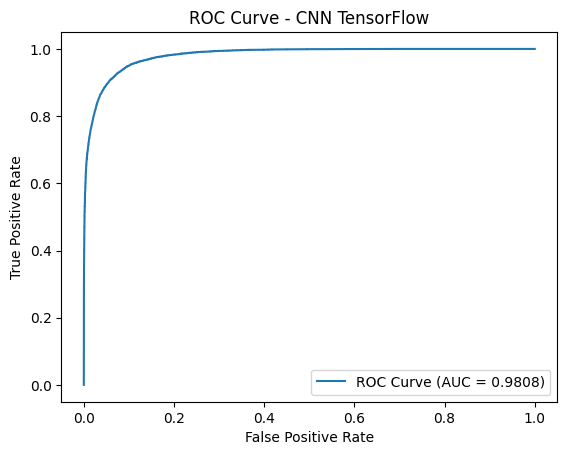

In [20]:
# ROC & AUC
y_true_bin = tf.keras.utils.to_categorical(y_true, 10)
y_prob = np.array(y_prob)
fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_prob.ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - CNN TensorFlow")
plt.legend()
plt.show()

In [21]:
# MLP Model (Vanilla)
mlp_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

mlp_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

mlp_model.fit(ds_train, epochs=20, validation_data=ds_test)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.2133 - loss: 2.1977 - val_accuracy: 0.3133 - val_loss: 1.9203
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.2935 - loss: 1.9552 - val_accuracy: 0.3144 - val_loss: 1.9121
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.3153 - loss: 1.9063 - val_accuracy: 0.3341 - val_loss: 1.8388
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.3287 - loss: 1.8795 - val_accuracy: 0.3318 - val_loss: 1.8601
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.3331 - loss: 1.8675 - val_accuracy: 0.3608 - val_loss: 1.7957
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.3433 - loss: 1.8493 - val_accuracy: 0.3744 - val_loss: 1.7713
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.3453 - loss: 1.8352 - val_accuracy: 0.3718 - val_loss: 1.7777
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.3498 - loss: 1.8221 - val_accuracy

In [22]:
# Evaluate MLP Model
y_true, y_pred, y_prob = [], [], []
for img, label in ds_test:
    pred = mlp_model.predict(img)
    y_true.extend(label.numpy())
    y_pred.extend(np.argmax(pred, axis=1))
    y_prob.extend(pred)

print("=== TensorFlow MLP Report ===")
print(classification_report(y_true, y_pred, digits=4))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━

MLP

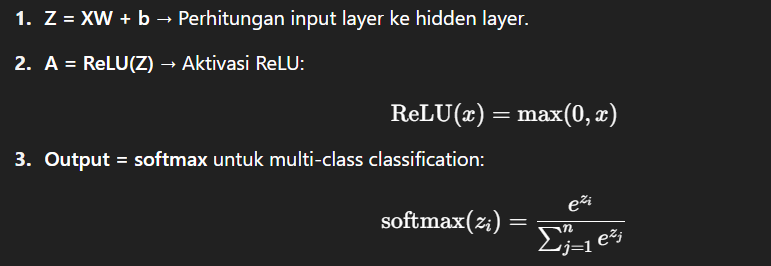

CNN

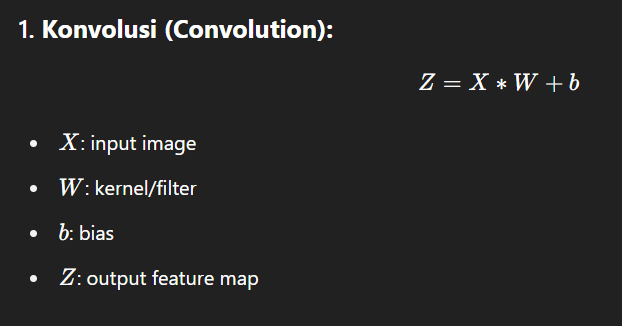

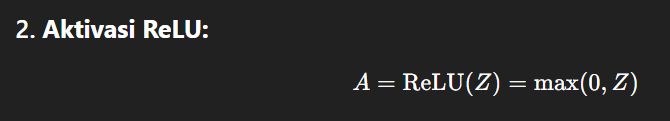

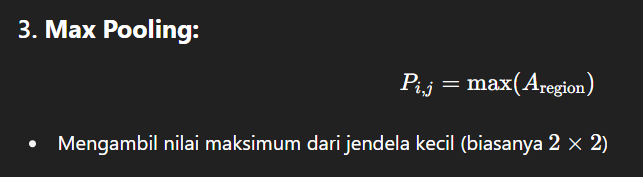

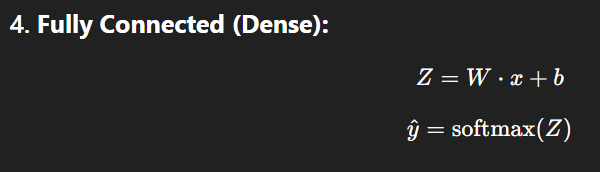

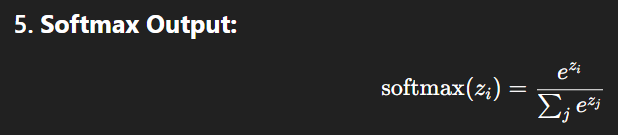

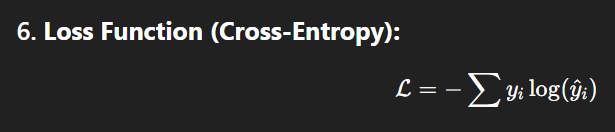

# Pytorch

In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [49]:
transform = transforms.Compose([
    transforms.ToTensor(),  # converts [0,255] -> [0,1]
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [50]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32*32*3, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))  # Z1 -> A1
        x = F.relu(self.fc2(x))  # Z2 -> A2
        x = self.fc3(x)          # Z3 -> output
        return x

mlp = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.001)

# Train MLP
for epoch in range(10):
    mlp.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = mlp(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Epoch 1, Loss: 1.6162
Epoch 2, Loss: 1.4749
Epoch 3, Loss: 1.6376
Epoch 4, Loss: 1.5031
Epoch 5, Loss: 1.4108
Epoch 6, Loss: 1.5679
Epoch 7, Loss: 1.3717
Epoch 8, Loss: 1.2952
Epoch 9, Loss: 1.5902
Epoch 10, Loss: 1.3280


In [51]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.fc1 = nn.Linear(4*4*128, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv1 + ReLU + Pool
        x = self.pool(F.relu(self.conv2(x)))  # Conv2 + ReLU + Pool
        x = self.pool(F.relu(self.conv3(x)))  # Conv3 + ReLU + Pool
        x = x.view(-1, 4*4*128)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

cnn = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)

# Train CNN
for epoch in range(15):
    cnn.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = cnn(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Epoch 1, Loss: 1.5980
Epoch 2, Loss: 1.0089
Epoch 3, Loss: 1.0653
Epoch 4, Loss: 0.8234
Epoch 5, Loss: 0.6720
Epoch 6, Loss: 0.6707
Epoch 7, Loss: 0.5952
Epoch 8, Loss: 0.4508
Epoch 9, Loss: 0.6229
Epoch 10, Loss: 0.4409
Epoch 11, Loss: 0.4167
Epoch 12, Loss: 0.4597
Epoch 13, Loss: 0.5251
Epoch 14, Loss: 0.1931
Epoch 15, Loss: 0.3776


In [52]:
def evaluate(model, loader):
    model.eval()
    y_true = []
    y_pred = []
    y_prob = []

    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            outputs = model(images)
            probs = F.softmax(outputs, dim=1).cpu().numpy()
            preds = np.argmax(probs, axis=1)

            y_true.extend(labels.numpy())
            y_pred.extend(preds)
            y_prob.extend(probs)

    return np.array(y_true), np.array(y_pred), np.array(y_prob)

# Evaluasi MLP
y_true_mlp, y_pred_mlp, y_prob_mlp = evaluate(mlp, test_loader)
# Evaluasi CNN
y_true_cnn, y_pred_cnn, y_prob_cnn = evaluate(cnn, test_loader)



=== MLP Classification Report ===
              precision    recall  f1-score   support

           0     0.6029    0.5480    0.5741      1000
           1     0.5423    0.6930    0.6084      1000
           2     0.3973    0.2320    0.2929      1000
           3     0.3292    0.4770    0.3895      1000
           4     0.3971    0.4860    0.4371      1000
           5     0.4538    0.2950    0.3576      1000
           6     0.5890    0.4700    0.5228      1000
           7     0.5051    0.6450    0.5665      1000
           8     0.5316    0.7240    0.6130      1000
           9     0.6759    0.3170    0.4316      1000

    accuracy                         0.4887     10000
   macro avg     0.5024    0.4887    0.4794     10000
weighted avg     0.5024    0.4887    0.4794     10000

MLP AUC (macro-average): 0.8818


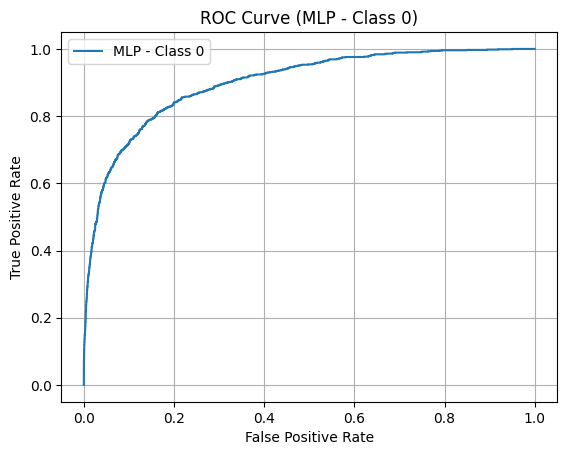


=== CNN Classification Report ===
              precision    recall  f1-score   support

           0     0.7369    0.8290    0.7802      1000
           1     0.8096    0.8930    0.8493      1000
           2     0.6711    0.6630    0.6670      1000
           3     0.6060    0.5460    0.5744      1000
           4     0.7792    0.6600    0.7147      1000
           5     0.6104    0.7410    0.6694      1000
           6     0.7849    0.8500    0.8161      1000
           7     0.8160    0.7630    0.7886      1000
           8     0.8624    0.8400    0.8511      1000
           9     0.8843    0.7340    0.8022      1000

    accuracy                         0.7519     10000
   macro avg     0.7561    0.7519    0.7513     10000
weighted avg     0.7561    0.7519    0.7513     10000

CNN AUC (macro-average): 0.9668


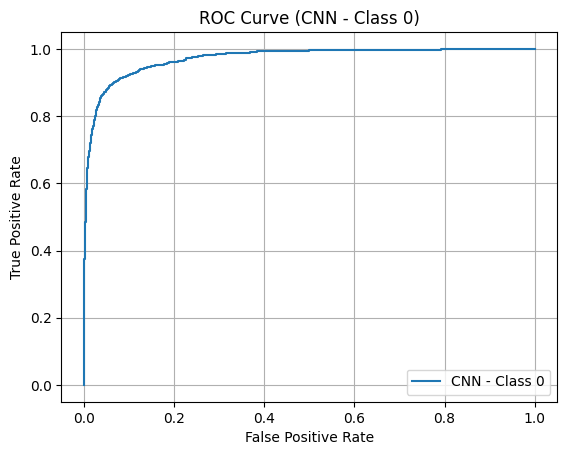

In [53]:
def full_report(y_true, y_pred, y_prob, model_name="Model"):
    print(f"\n=== {model_name} Classification Report ===")
    print(classification_report(y_true, y_pred, digits=4))

    # AUC
    y_true_bin = label_binarize(y_true, classes=range(10))
    auc = roc_auc_score(y_true_bin, y_prob, multi_class='ovr')
    print(f"{model_name} AUC (macro-average): {auc:.4f}")

    # ROC Curve untuk Class 0
    fpr, tpr, _ = roc_curve(y_true_bin[:, 0], y_prob[:, 0])
    plt.plot(fpr, tpr, label=f'{model_name} - Class 0')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({model_name} - Class 0)')
    plt.grid()
    plt.legend()
    plt.show()

# Cetak hasil
full_report(y_true_mlp, y_pred_mlp, y_prob_mlp, "MLP")
full_report(y_true_cnn, y_pred_cnn, y_prob_cnn, "CNN")


MLP

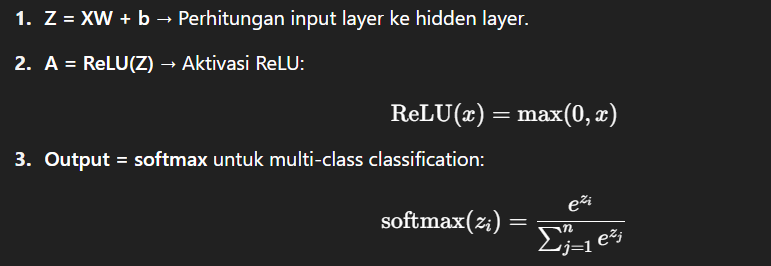

CNN

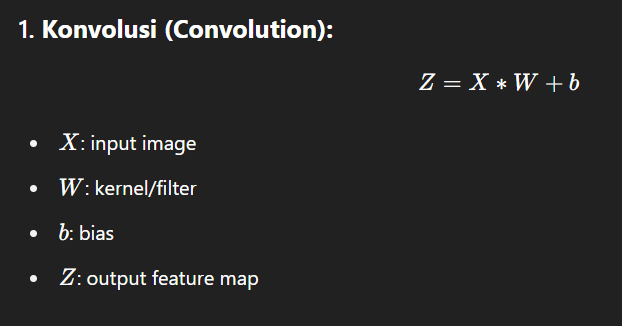

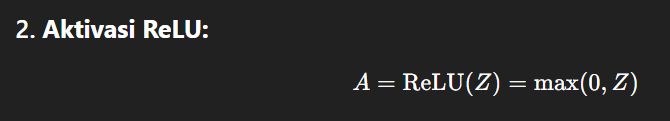

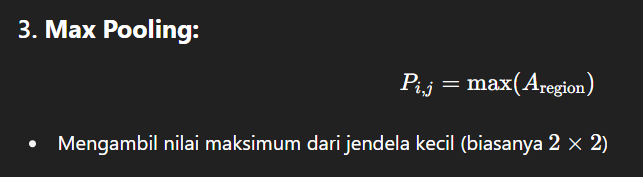

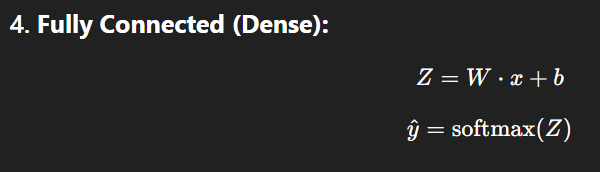

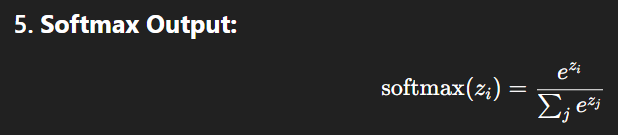

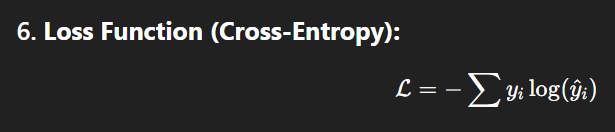